## Use the same blocks for the kawasaki all_nsample1000 test run analysis
---

In [1]:
### Starting here:
from os.path import join, basename, exists
import os
import yaml
import pandas as pd 
import numpy as np
from glob import glob
%load_ext autoreload
%autoreload 2

from src.config import DATA_DIR, PARAMS_DIR, RESULTS, ROOT_DIR
print(DATA_DIR)


#The parameter file depending on the analysis
parameter_f = join(PARAMS_DIR, "kawasaki", "test_run", "kawasaki_snakemake_A1B1.yaml")
# with open(parameter_f,'r') as f:
#     params = yaml.load(f, Loader=yaml.Loader)
with open(parameter_f, 'r') as f:
    params = yaml.safe_load(f)

print(parameter_f)
print(params)

### Make results directory 

results_dir =  join(RESULTS, params["prefix"])
print(results_dir)
if not exists(RESULTS):
    print(f"{RESULTS} is not made yet! Make that first")

else:
    if not exists(results_dir):
        os.makedirs(results_dir)


os.chdir(ROOT_DIR)


Project Directory: /data2/isshamie/time_neutrophils
/data2/isshamie/time_neutrophils/data
/data2/isshamie/time_neutrophils/parameters/kawasaki/test_run/kawasaki_snakemake_A1B1.yaml
{'raw_dir': 'raw/kawasaki/FCS Files/', 'prefix': 'kawasaki/test_run/A1B1', 'tidy_name': 'tidy', 'wells': ['A01', 'B01'], 'name': {'start': 'Test Run - ', 'end': '.csv'}, 'features': ['Cell Tracker Intensity', 'PI Intensity', 'AnexinV Intensity', 'Cell Aspect Ratio', 'Cell Size', 'Cell Circularity'], 'normalizations': ['log10_z'], 'reduction': 'umap', 'n_subsample': 0, 'n_iters': 3, 'min_neighbors': [15, 200, 100], 'min_distances': [0], 'cluster_technique': 'hdb', 'min_cluster_size': [30, 60], 'min_sample': [100]}
/data2/isshamie/time_neutrophils/data/processed/kawasaki/test_run/A1B1


In [2]:
from mplh.fig_utils import num_rows_cols

fig_utils from mplh


### Until Here
---
---

In [3]:
from src.plot_umap_embeddings import *

Project Directory: /data2/isshamie/time_neutrophils

Config paths:
__name__ src.params
__package__ src
__file__ /data2/isshamie/time_neutrophils/src/params.py
__cached__ /data2/isshamie/time_neutrophils/src/__pycache__/params.cpython-37.pyc
path /data2/isshamie/time_neutrophils/src/params.py
DATA_DIR /data2/isshamie/time_neutrophils/data
RAW_DIR /data2/isshamie/time_neutrophils/data/raw
PROCESSED /data2/isshamie/time_neutrophils/data/processed
PARAM_DIR /data2/isshamie/time_neutrophils/parameters
RESULTS /data2/isshamie/time_neutrophils/results
FIGURES_DIR /data2/isshamie/time_neutrophils/figures


In [4]:
data_f = "data/processed/kawasaki/test_run/A1B1/transform/data_df_log10_z.p"
meta_f = "data/processed/kawasaki/test_run/A1B1/tidy/meta.tsv"
umap_f = "results/kawasaki/test_run/A1B1/log10_z/umap_out/200_0.0/embedding_2.p"

fig_dir = "figures/kawasaki/test_run/A1B1/log10_z/umap_out/200_0.0/sim2"
min_neighbor = 200 
min_distance = 0.0
data, meta = load_data(data_f, meta_f)

# plot_embedding_features(data, meta, umap_f, fig_dir,
#                     min_neighbor=min_neighbor, min_distance=min_distance, labels_f=cluster_f, labels_to_keep=labels_to_keep)

In [5]:
curr_df = subset_on_clusters(data, meta, umap_f, labels_f=None, labels_to_keep=None)
curr_df["Well"] = curr_df.apply(lambda x: str(x["Stimuli"])+"_"+ str(x["Sample"]), axis=1)

curr_df.head()


,Sample,Timepoint,Stimuli,Field Number,embedding_1,embedding_2,Cell Size,Cell Circularity,Cell Aspect Ratio,Cell Tracker Intensity,PI Intensity,AnexinV Intensity,Well
0_1_A_1,1,1,A,1,-4.326128,1.057327,2.179886,-0.776020,0.875849,-2.532236,-1.145520,-0.985061,A_1
1_1_A_1,1,1,A,1,3.336087,7.078618,-0.186371,0.171571,0.536852,0.240823,-1.115048,-0.860357,A_1
2_1_A_1,1,1,A,1,2.108706,9.870535,0.630134,0.196555,-0.310632,0.068787,-1.103540,-0.843493,A_1
3_1_A_1,1,1,A,1,3.900787,10.536365,0.258330,0.275991,-0.725682,0.135920,-1.107754,-0.856527,A_1
4_1_A_1,1,1,A,1,1.845646,2.946728,-0.843220,-3.065569,4.031411,-1.329763,-1.121349,-1.006113,A_1


In [6]:
samples = subsamp(curr_df, meta=meta, n_subsample=0.25)

0.25 fraction


## Hex Plot

2 1


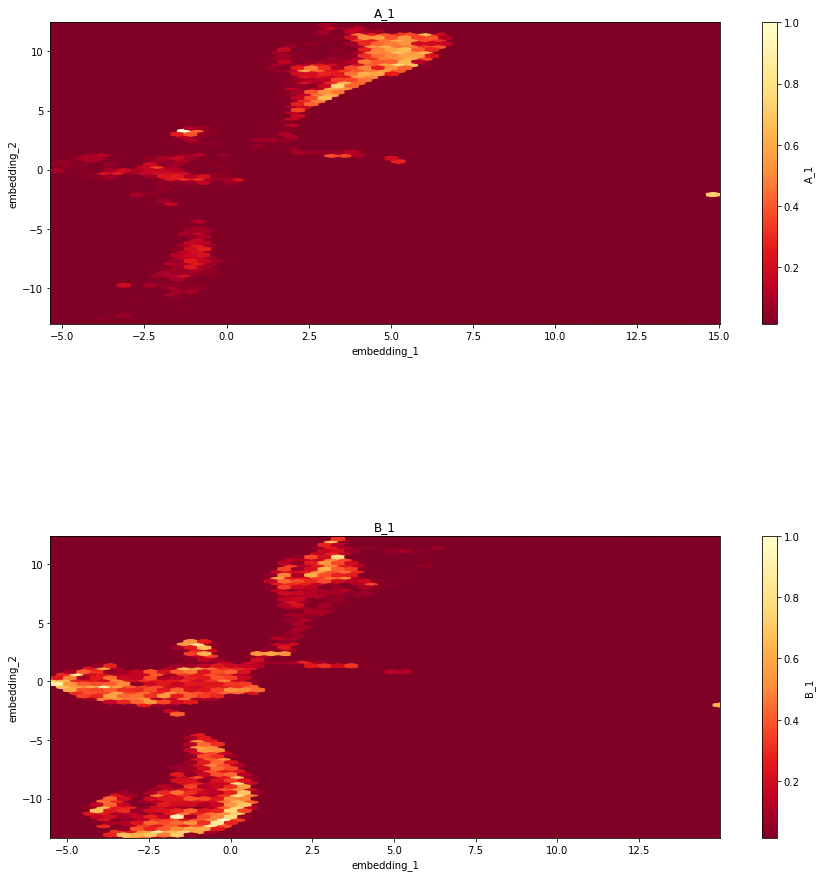

In [7]:
run_plot_hex(samples, col="Well",vals=None,norm_color=True, show_cbar=True)
plt.savefig(join(fig_dir, "umap_hex_wells.png"))
plt.savefig(join(fig_dir, "umap_hex_wells.pdf"))

## Plot UMAP embeddings colored by timepoints

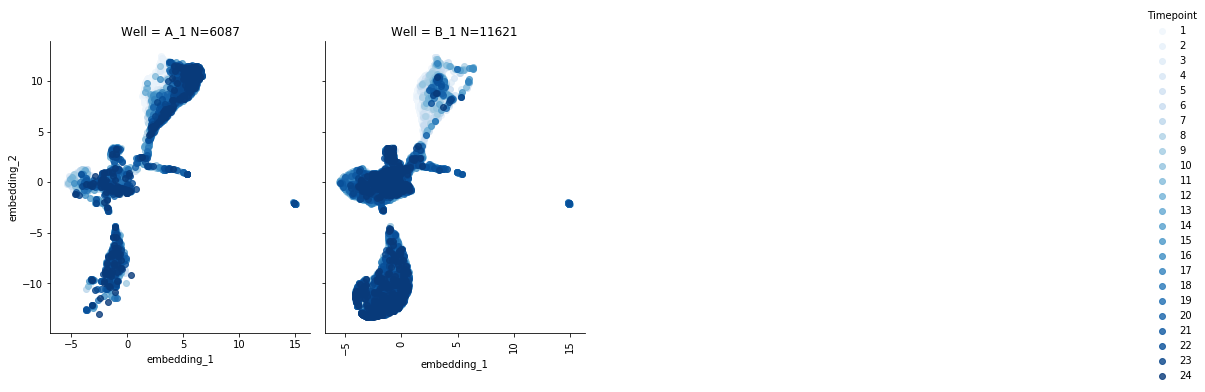

In [8]:
g = run_plot(samples, vals=None)
plt.savefig(join(fig_dir, "umap_wells.png"))
plt.savefig(join(fig_dir, "umap_wells.pdf"))

### Smaller n for clarity

0.1 fraction
0.1 fraction
0.1 fraction
0.1 fraction
0.1 fraction


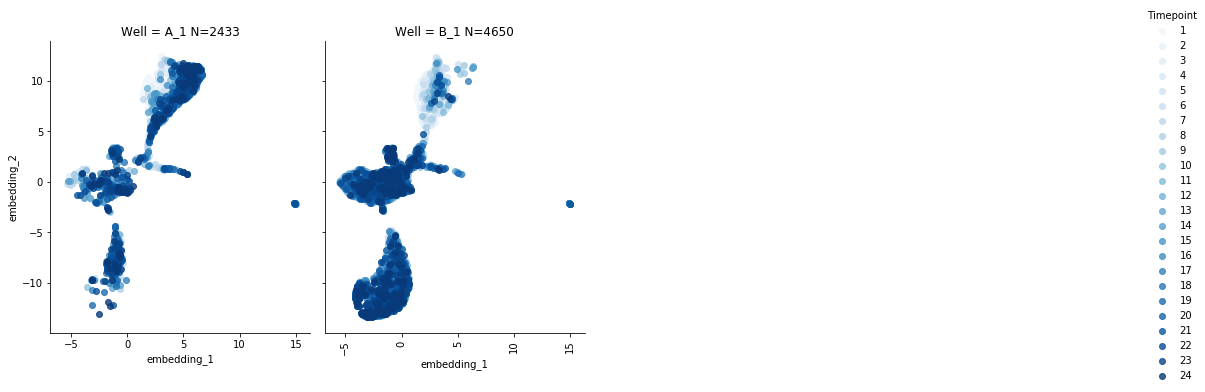

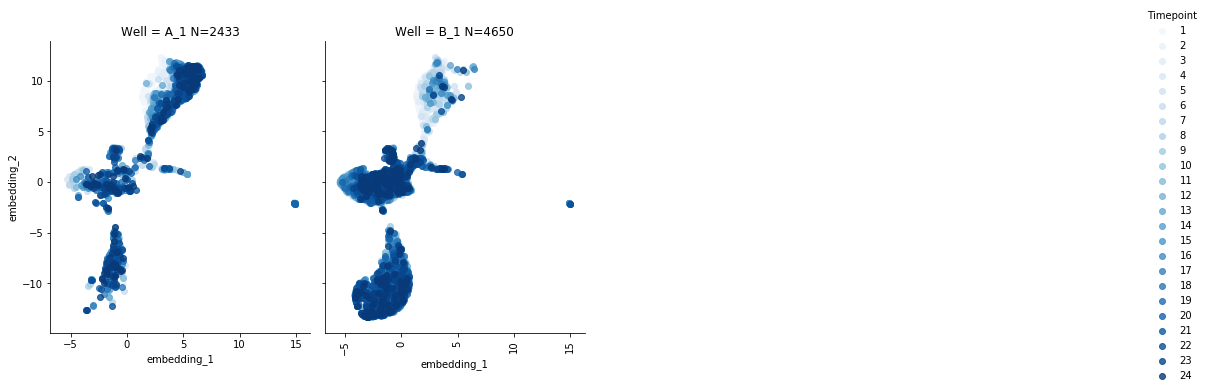

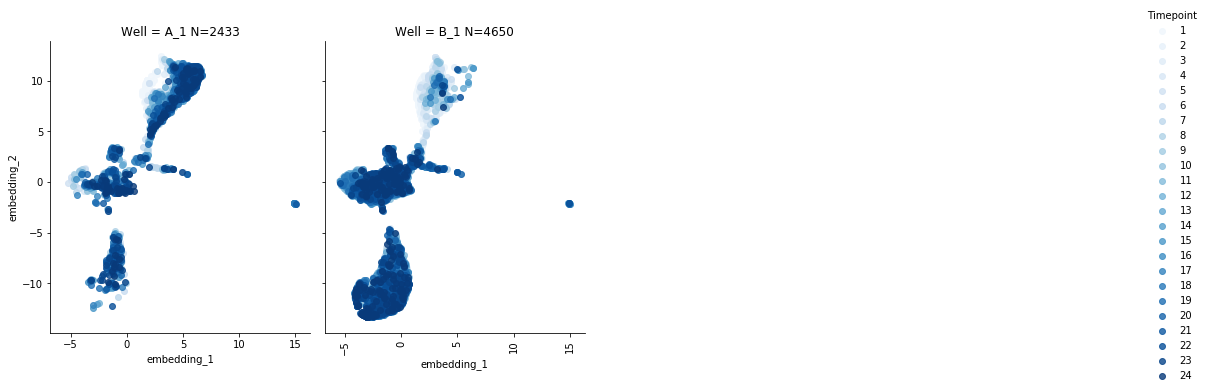

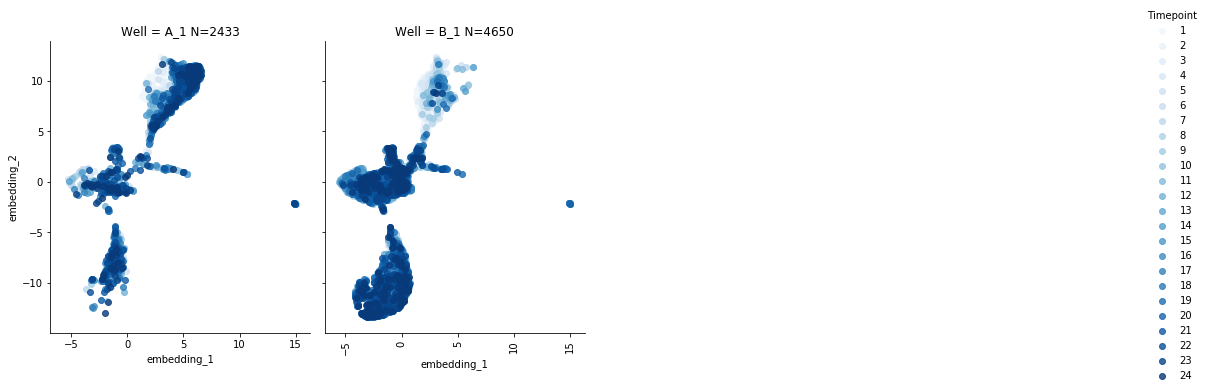

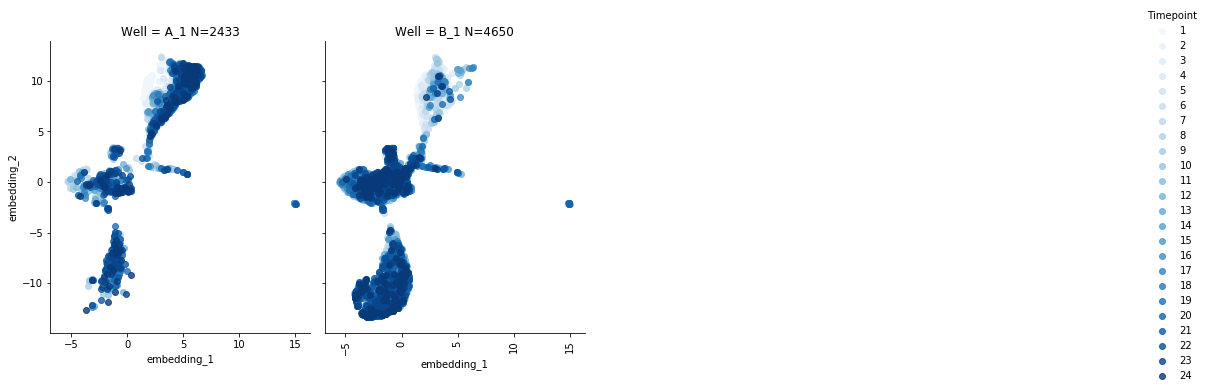

In [9]:
for i in range(5):
    curr_samples = subsamp(curr_df, meta=meta, n_subsample=0.1)
    g = run_plot(curr_samples, vals=None)
